In [3]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# 设定数据路径
base_path = '/media/lan/chen/没有外加磁场HHG'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 6
file_name = f"{file_prefix}{file_index:05d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

Reading file /media/lan/chen/没有外加磁场HHG/density00006.sdf
t() = time
x(3001, 2401) = grid
y(3001, 2401) = grid
xc(3000, 2400) = grid_mid
yc(3000, 2400) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1, 80]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [3000, 2400]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [3000, 2400]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [3000, 2400]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable'> [3000, 2400]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2, 81]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1, 80]
Grid_Grid <class 'sdf.BlockPlainMesh'> [3001, 2401]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [3000, 2400]
Tota

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx-25/density0015.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid


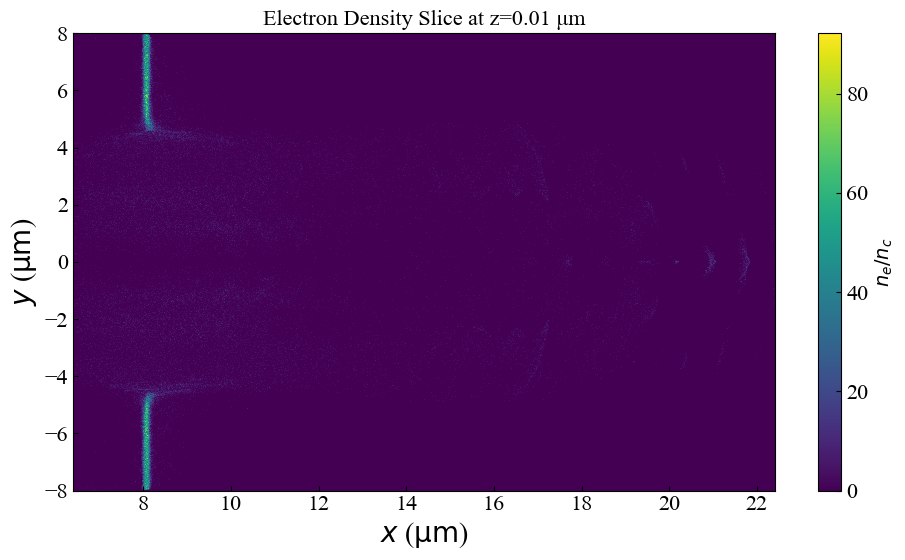

In [2]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

def set_global_plot_style():
    mpl.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 20,
        'axes.labelsize': 20,
        'axes.titlesize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'xtick.minor.size': 4,
        'ytick.minor.size': 4,
        'xtick.minor.width': 1,
        'ytick.minor.width': 1,
        'legend.fontsize': 12,
        'figure.titlesize': 16
    })

set_global_plot_style()

# 设定数据路径
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx-25'
# base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/电子片4'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 15
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

den_crit = 0.11148542159E+28
Density_Data = sh.getdata(file_path)
ne = Density_Data.Derived_Number_Density_Electron.data / den_crit

grid = Density_Data.Grid_Grid_mid.data
dims = len(grid)
grid = [g / 1e-6 for g in grid]  # 转换为微米

if dims == 1:
    x = grid[0]
    plt.figure(figsize=(8, 5))
    plt.plot(x, ne)
    plt.xlabel(r'$x$ ($\mathrm{\mu m}$)')
    plt.ylabel(r'$n_e / n_c$')
    plt.title('Electron Density Lineout')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

elif dims == 2:
    x, y = grid
    X, Y = np.meshgrid(x, y, indexing='ij')
    fig, ax = plt.subplots(figsize=(10, 6))
    c = ax.pcolormesh(X, Y, ne, shading='auto')
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label(r'$n_e / n_c$', fontsize=14)
    ax.set_xlabel(r'$x$ ($\mathrm{\mu m}$)')
    ax.set_ylabel(r'$y$ ($\mathrm{\mu m}$)')
    ax.set_title('Electron Density Distribution (2D)')
    plt.tight_layout()
    plt.show()

elif dims == 3:
    x, y, z = grid
    z_index = ne.shape[2] // 2
    ne_slice = ne[:, :, z_index]
    X, Y = np.meshgrid(x, y, indexing='ij')
    fig, ax = plt.subplots(figsize=(10, 6))
    c = ax.pcolormesh(X, Y, ne_slice, shading='auto')
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label(r'$n_e / n_c$', fontsize=14)
    ax.set_xlabel(r'$x$ ($\mathrm{\mu m}$)')
    ax.set_ylabel(r'$y$ ($\mathrm{\mu m}$)')
    ax.set_title(f'Electron Density Slice at z={z[z_index]:.2f} μm')
    plt.tight_layout()
    plt.show()

else:
    raise ValueError("Unsupported dimensionality in SDF file.")
